# Feature Engineering and Data Processing 

##### we have created the following columns

- family_size
- age_band
- is_small_family
- is_large_family
- Fare_cat
- ticket_len
- ticket_letter
- cabin_letter

#### we have imputed the following columns 

- Cabin
- Embarked

In [2]:
# import packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set()

In [24]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [25]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


### create family_size and is_alone column

- sibsp + parch + themselves

In [26]:
train['family_size'] = train['SibSp'] + train['Parch'] + 1
test['family_size'] = test['SibSp'] + test['Parch'] + 1

for data in [train, test]:
    data['is_alone'] =0
    data.loc[(data['family_size'] == 1), 'is_alone'] = 1

In [31]:
# create age_band, missing age data is fallen in age_band == 0
for data in [train, test]:
    data['age_band'] =0
    data.loc[data['Age'] <= 16,'age_band'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'age_band'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'age_band'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'age_band'] = 3
    data.loc[(data['Age'] > 64), 'age_band'] = 3

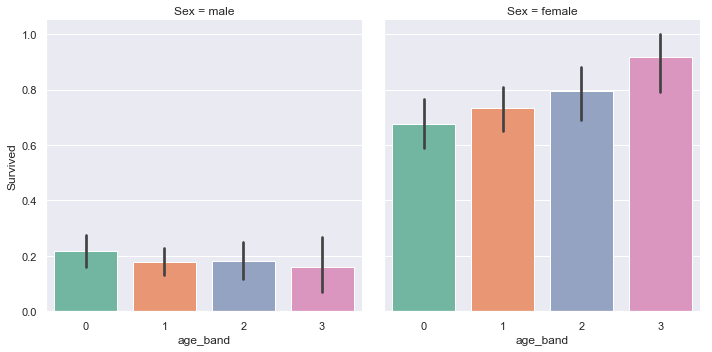

In [34]:
sns.catplot(x='age_band',y='Survived',data=train,col='Sex', kind="bar", palette="Set2")
plt.show()

In [45]:
# create is_small_family and is_large_family variables

for data in [train, test]:
    data['is_small_family'] = data['family_size'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    data['is_large_family'] = data['family_size'].map(lambda s: 1 if 5 <= s else 0)

In [50]:
# create fare_category
for data in [train, test]:
    data['Fare_cat']=0
    data.loc[data['Fare'] <= 7.91,'Fare_cat'] = 0
    data.loc[(data['Fare']>7.91) & (data['Fare'] <= 14.454),'Fare_cat'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31),'Fare_cat'] = 2
    data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513),'Fare_cat'] = 3

In [63]:
# create ticket_length and ticket_first_letter
for data in [train, test]:
    data['ticket_len'] = data['Ticket'].apply(len)  
    data['ticket_letter'] = data['Ticket'].str[0]

In [68]:
# create the chart of ticket relation
ticket_len = train[['ticket_len', 'Survived']].groupby(['ticket_len'], as_index=False).mean().sort_values(by='Survived', ascending=False)
ticket_letter = train[['ticket_letter', 'Survived']].groupby(['ticket_letter'], as_index=False).mean().sort_values(by='Survived', ascending=False)
ticket_len

,ticket_len,Survived
2,5,0.618321
5,8,0.539474
13,17,0.428571
9,12,0.400000
10,13,0.400000
1,4,0.366337
7,10,0.341463
11,15,0.333333
3,6,0.319809
4,7,0.296296


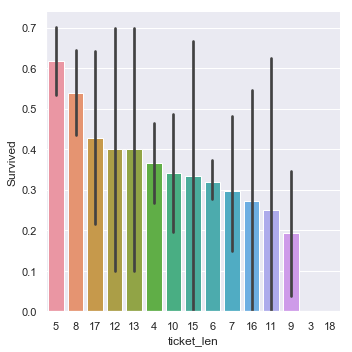

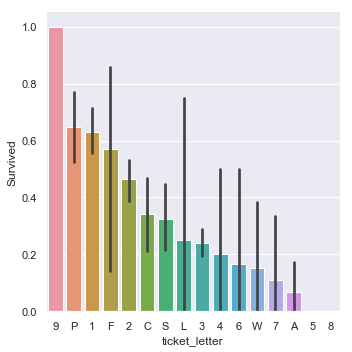

In [70]:
sns.catplot(x='ticket_len', y="Survived", data=train , kind="bar", order=ticket_len['ticket_len'])
sns.catplot(x='ticket_letter', y="Survived", data=train, kind="bar", order=ticket_letter['ticket_letter'])

In [75]:
all_df = pd.concat([train, test],sort = True)
#Displaying values counts
print(all_df['ticket_letter'].value_counts())

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
7     13
F     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: ticket_letter, dtype: int64


regarding W, 7, F, 4, 6, L, 5, 9, 8 they are rare letters, so we pass the label rare

In [76]:
# replace the entries Rare_Low_Survival and Rare_high_Survival
for data in [train, test]:
    data['ticket_letter'] = data['ticket_letter'].replace(['W', '4', '7', '6', 'L', '5', '8'], 'Rare_Low_Survival')
    data['ticket_letter'] = data['ticket_letter'].replace(['F', '9'], 'Rare_High_Survival')

In [83]:
# impute NO to missing data and add cabin_letter column 

for data in [train, test]:
  #Filling missing values
  data['Cabin'] = data['Cabin'].fillna('N0')
  #Getting the first letter of the column
  data['cabin_letter'] = data['Cabin'].str[0]

# we not have T at test data so we replace it 
train['cabin_letter'] = train['cabin_letter'].replace(['T'], 'N')

In [88]:
# impute Embarked 
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode().iloc[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode().iloc[0])

# encoding / drop the columns
- what is the best encoding in this dataset? / encode all categorical variables thats stored as integers
- which columns contribute to survival percentage

In [90]:
#removing all columns that we don't need
train.drop(['PassengerId','Name','Ticket', 'Cabin','Fare','Age','SibSp','Parch'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket', 'Cabin','Fare','Age','SibSp','Parch'],axis=1,inplace=True)

In [101]:

#handling categorical variables
train = pd.get_dummies(train, columns=['Sex','Embarked', 'Pclass','ticket_letter','cabin_letter', 'Fare_cat','is_small_family','is_large_family'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex','Embarked', 'Pclass','ticket_letter','cabin_letter', 'Fare_cat','is_small_family','is_large_family'], drop_first=True)


# standardization 
- standardize the data with train data frame and apply it to both tran and test data

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# drop response variable and fit
scaler.fit(train.drop(['Survived'],axis=1))

# transform train
scaled_features = scaler.transform(train.drop(['Survived'],axis=1))
train_scaled = pd.DataFrame(scaled_features) 

# transform test
scaled_features = scaler.transform(test)
test_scaled = pd.DataFrame(scaled_features)